In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
import xgboost as xgb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the dataset
df = pd.read_csv("data/data.csv")
df.sample(5, random_state=42)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#check for null values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# from ydata_profiling import ProfileReport 

In [8]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# df = pd.read_csv("data/data.csv")
# profile = ProfileReport(df, title="EDA Report", explorative=True)

In [9]:
df['gender'].value_counts()


gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df['Dependents'].value_counts()


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [11]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

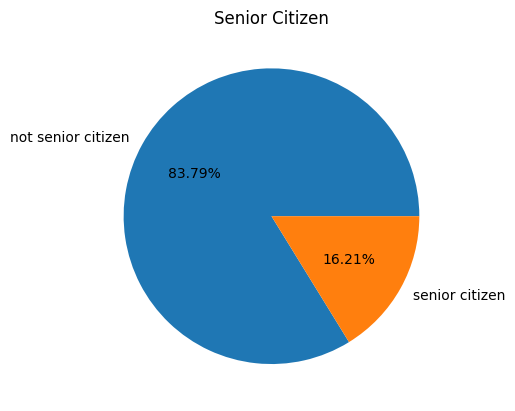

In [12]:
plt.pie(df['SeniorCitizen'].value_counts(), labels=['not senior citizen', 'senior citizen'], autopct='%1.2f%%')
plt.title('Senior Citizen')
plt.show()

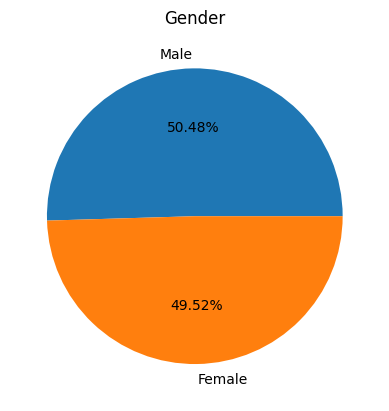

In [13]:
plt.pie(df['gender'].value_counts(), labels = ['Male', 'Female'], autopct='%1.2f%%')
plt.title('Gender')
plt.show()

In [14]:
df['Partner'].value_counts()


Partner
No     3641
Yes    3402
Name: count, dtype: int64

[]

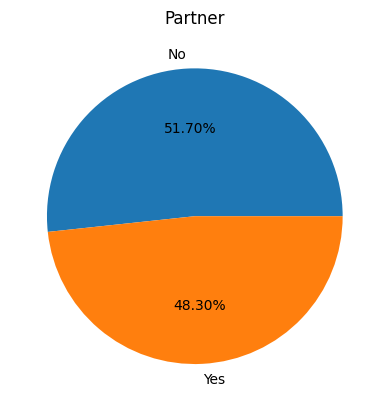

In [15]:
plt.pie(df['Partner'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title('Partner')
plt.plot()

In [16]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

[]

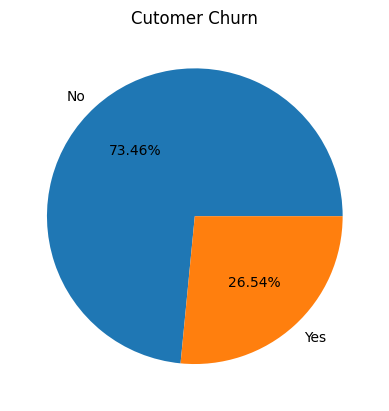

In [17]:
plt.pie(df['Churn'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
plt.title('Cutomer Churn')
plt.plot()

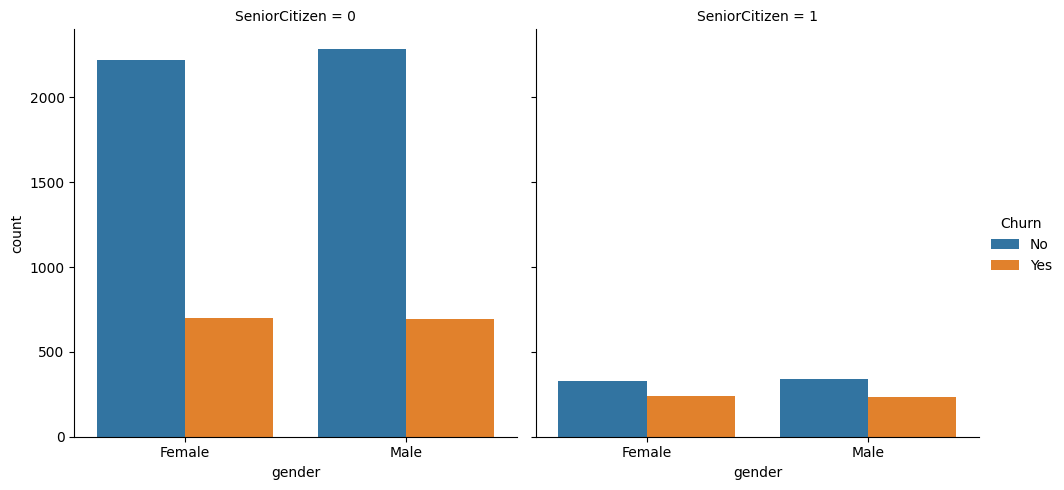

In [18]:
# found imablance in the target variable
sns.catplot(x='gender', hue='Churn', col='SeniorCitizen', data=df, kind='count')
plt.show()

In [19]:
# so far oberved
# number of senior citizen is less than non senior citizen
# gender is almost equally distributed in both non senior citizen and senior citizen
# Equal distribution of churn in male and female



In [20]:
df['TotalCharges'].replace(" ", 0, inplace = True)


In [21]:
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [22]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:'No' if x == 0 else 'Yes')


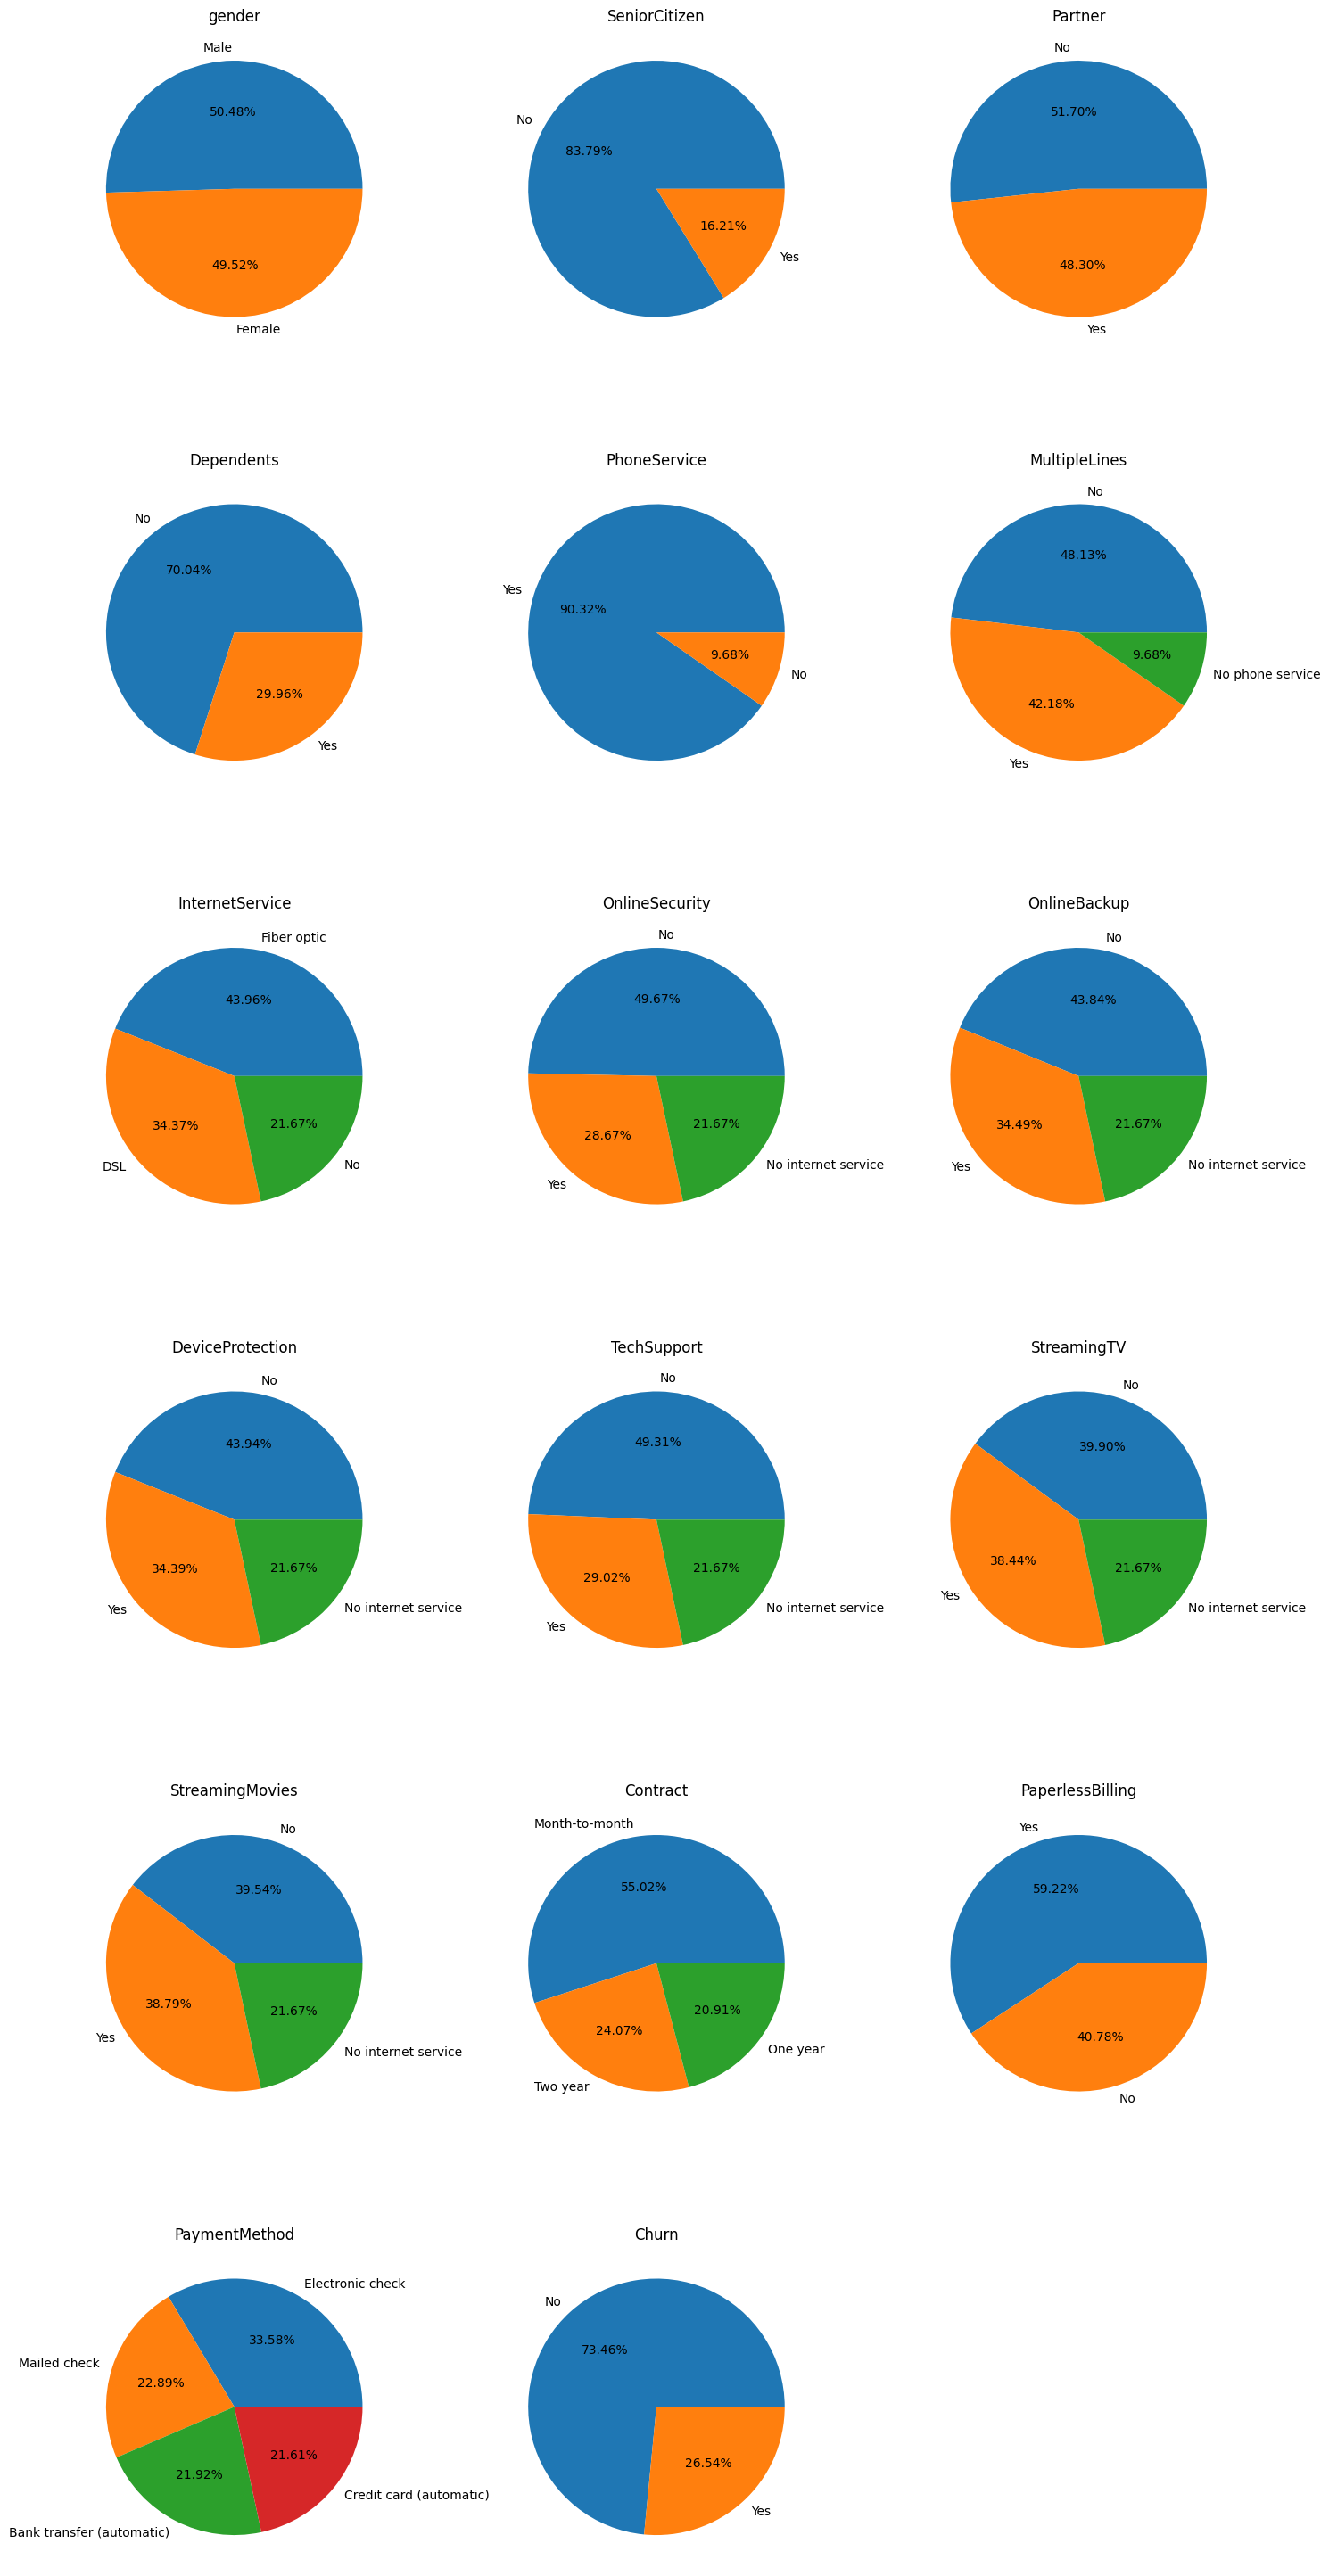

In [24]:
# Get only categorical columns except 'customerID'
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']
n = len(cat_cols)

cols = 3  # Charts per row
rows = math.ceil(n / cols)  # Auto calc rows needed

plt.figure(figsize=(5 * cols, 5 * rows))  # Adjust figure size

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)

    data = df[col].value_counts().values
    labels = df[col].value_counts().index

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
#construct a new column for internet service binary as yes or no (have internet service or not)

In [26]:
df.rename(columns={'InternetService' : 'InternetServiceTypes'}, inplace=True)


In [27]:
df['InternetService'] = df['InternetServiceTypes'].apply(lambda x:'Yes' if x in ['DSL', 'Fiber optic'] else 'No')


In [28]:
df['InternetService'].value_counts()


InternetService
Yes    5517
No     1526
Name: count, dtype: int64

In [29]:
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceTypes,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
4703,2956-GGUCQ,Male,Yes,Yes,No,24,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,78.85,1772.25,Yes,Yes
35,6234-RAAPL,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No,Yes
4473,2665-NPTGL,Female,Yes,Yes,No,26,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,2510.70,No,Yes
2777,4860-YZGZM,Male,No,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,185.40,No,No
1353,7073-QETQY,Male,No,Yes,Yes,66,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,1359.50,No,No


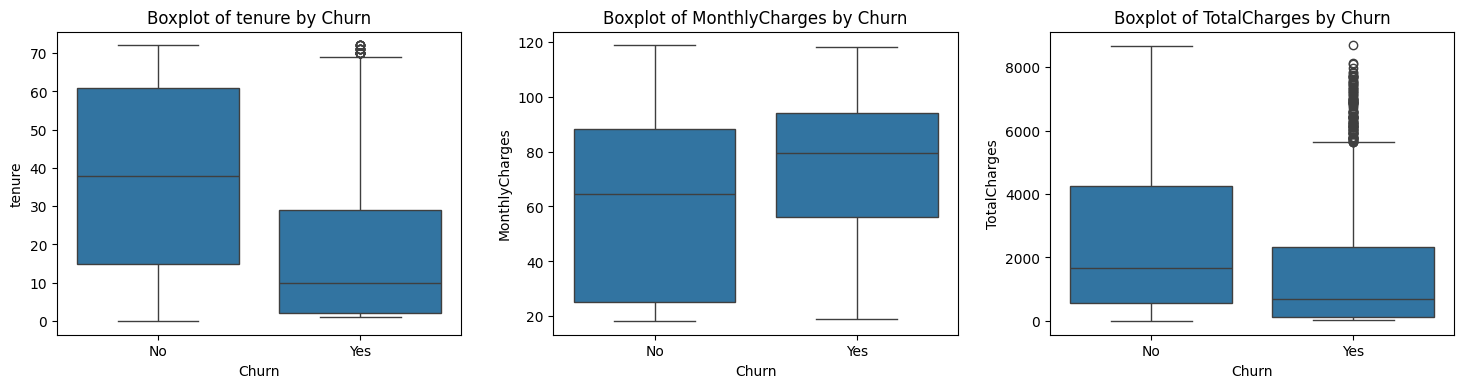

In [30]:
plt.figure(figsize=(15, 30))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i, col in enumerate(numeric_cols):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=col) 
    plt.title(f'Boxplot of {col} by Churn')

plt.tight_layout(pad=2)
plt.show()

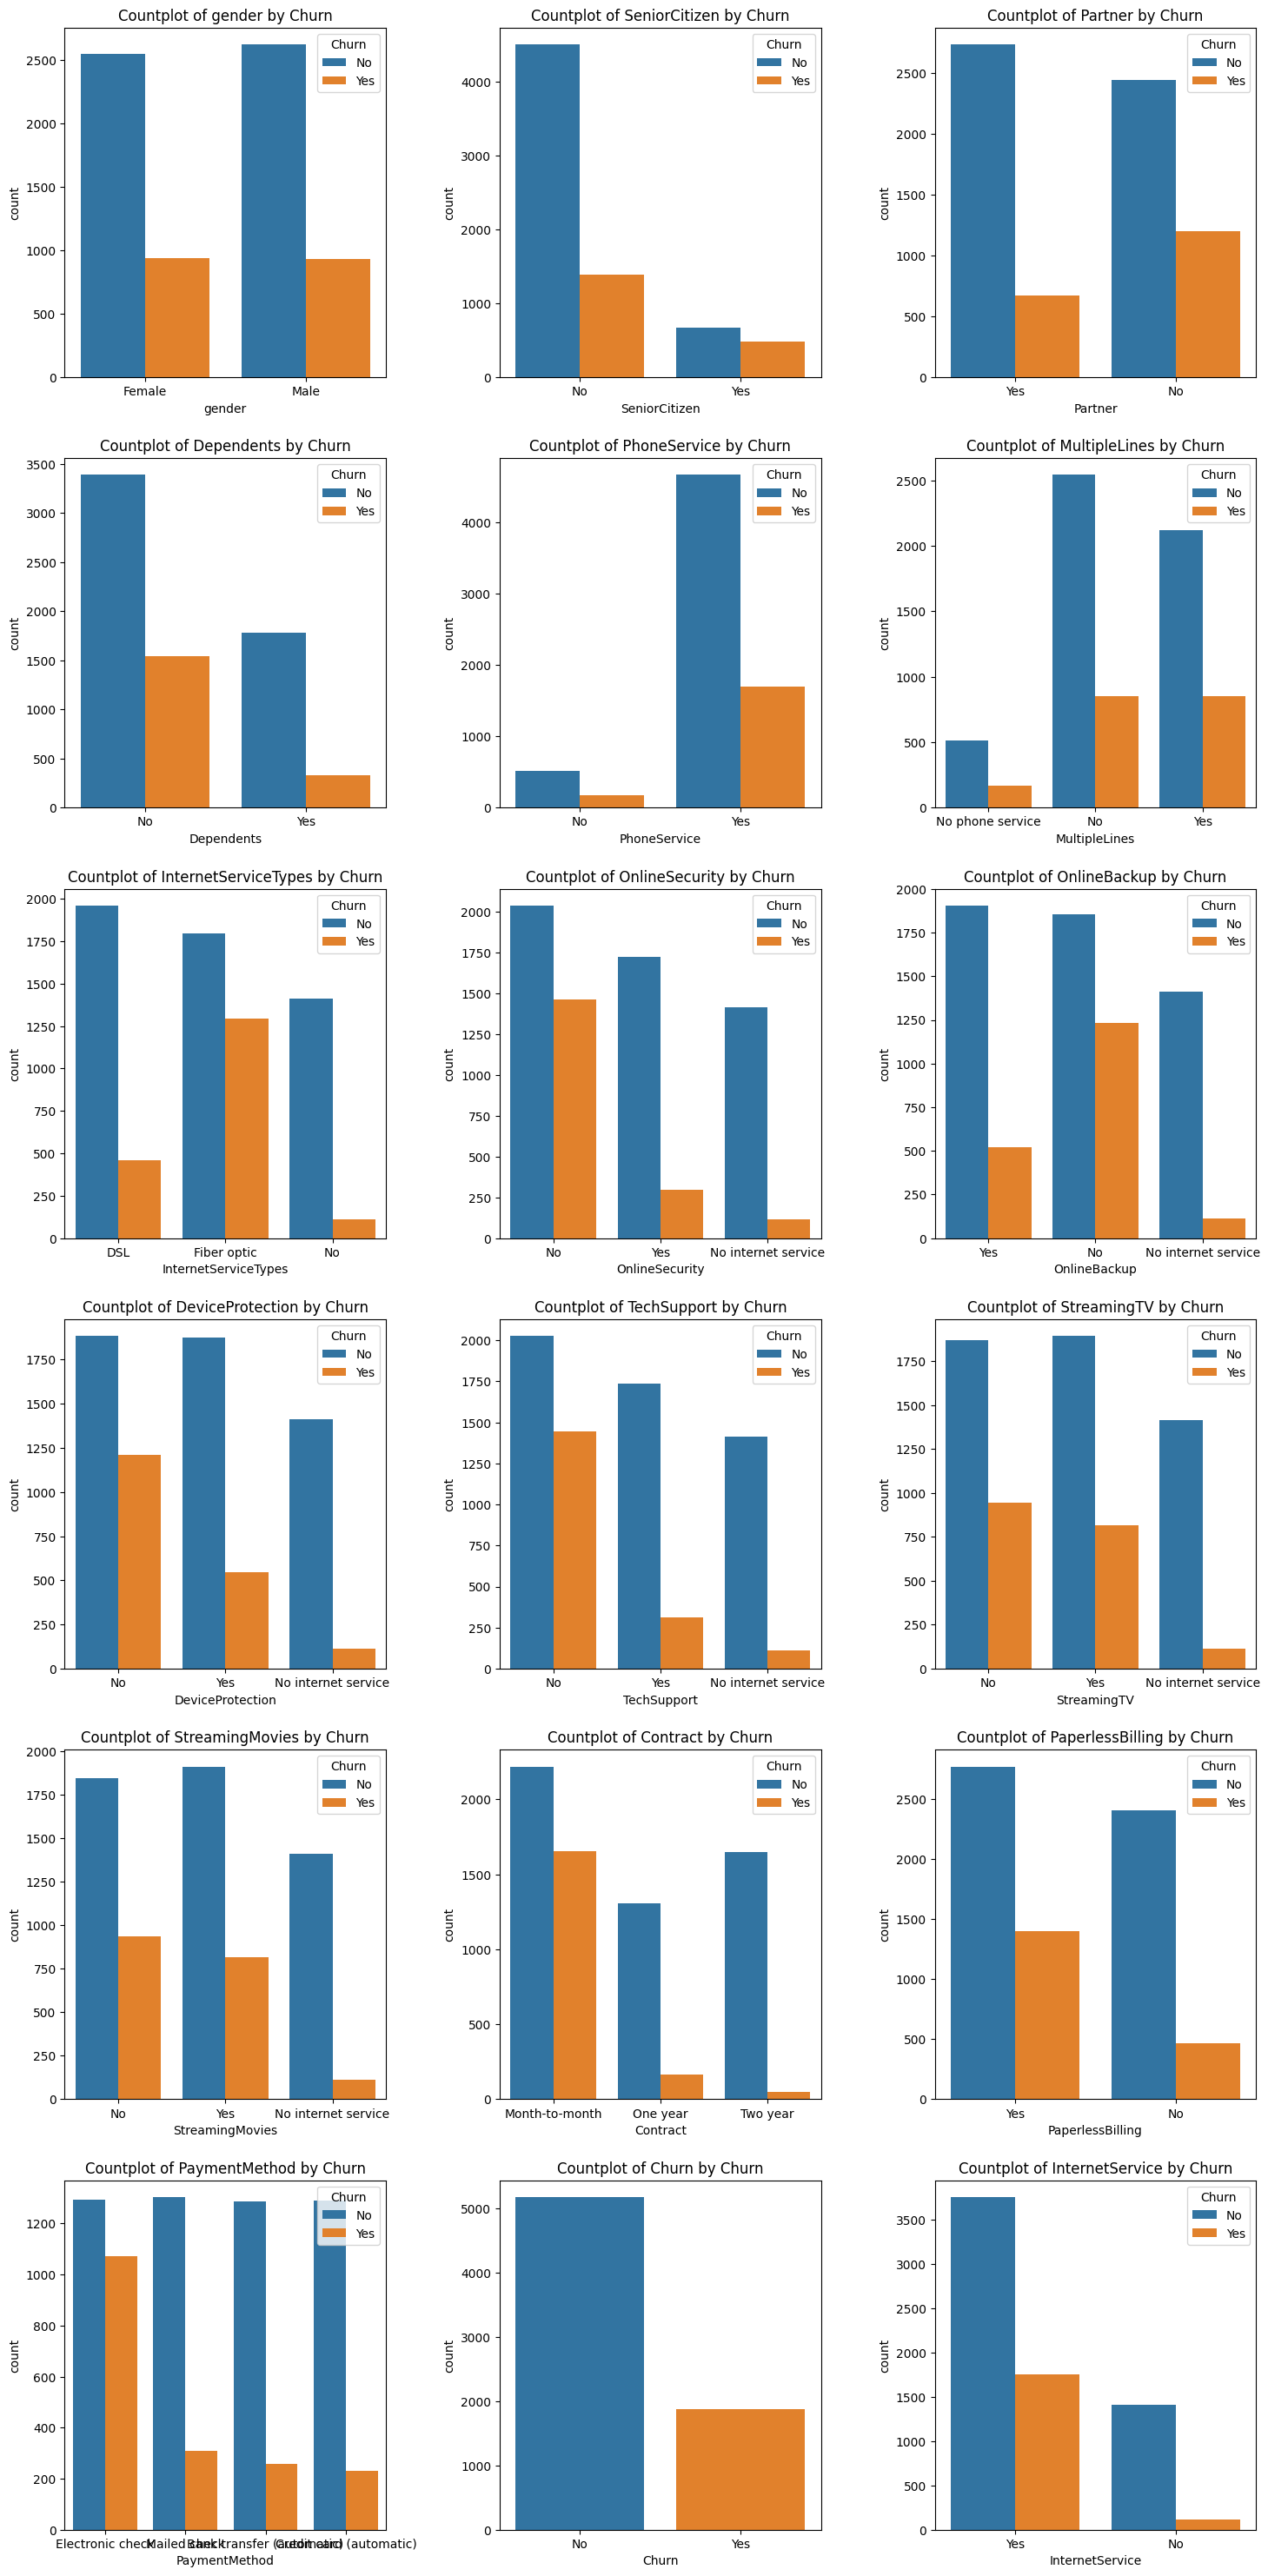

In [31]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)
    
    sns.countplot(data=df, x=col, hue='Churn') 
    plt.title(f'Countplot of {col} by Churn')

plt.tight_layout(pad=2)
plt.show()

In [32]:
# Customers with month-to-month contracts who pay via electronic check have a significantly higher churn rate compared to other groups.

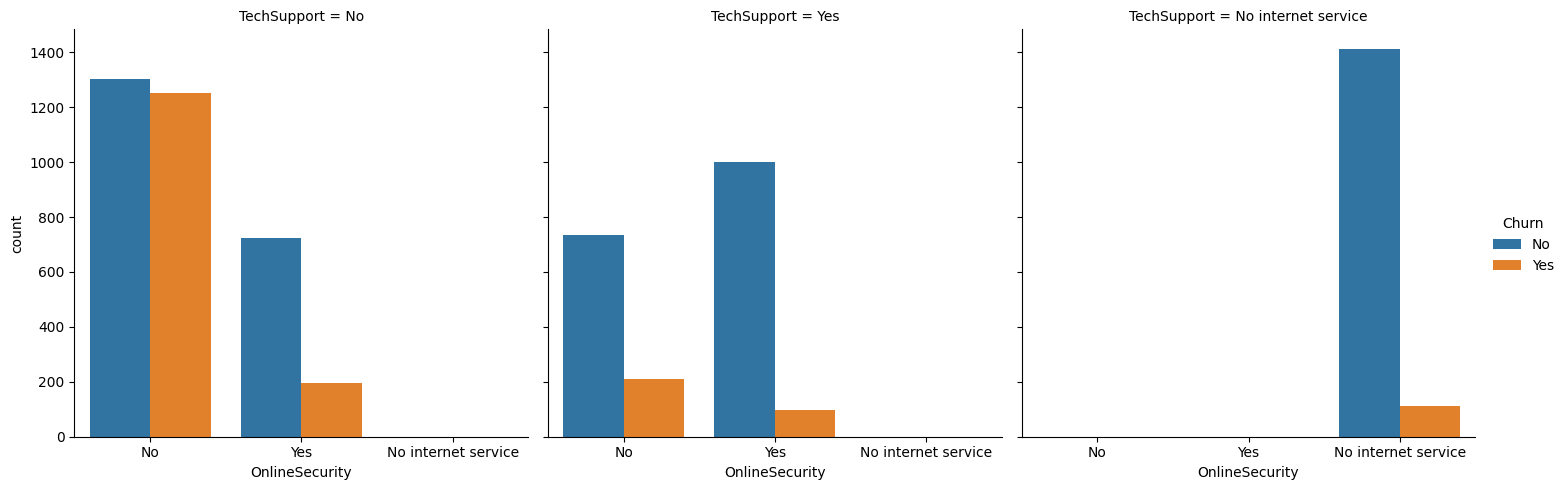

In [33]:
sns.catplot(x='OnlineSecurity', hue='Churn', col='TechSupport', kind='count', data=df)
plt.show()

In [34]:
#The customer with no online security and with no techsupport have higher churn rate than others¶


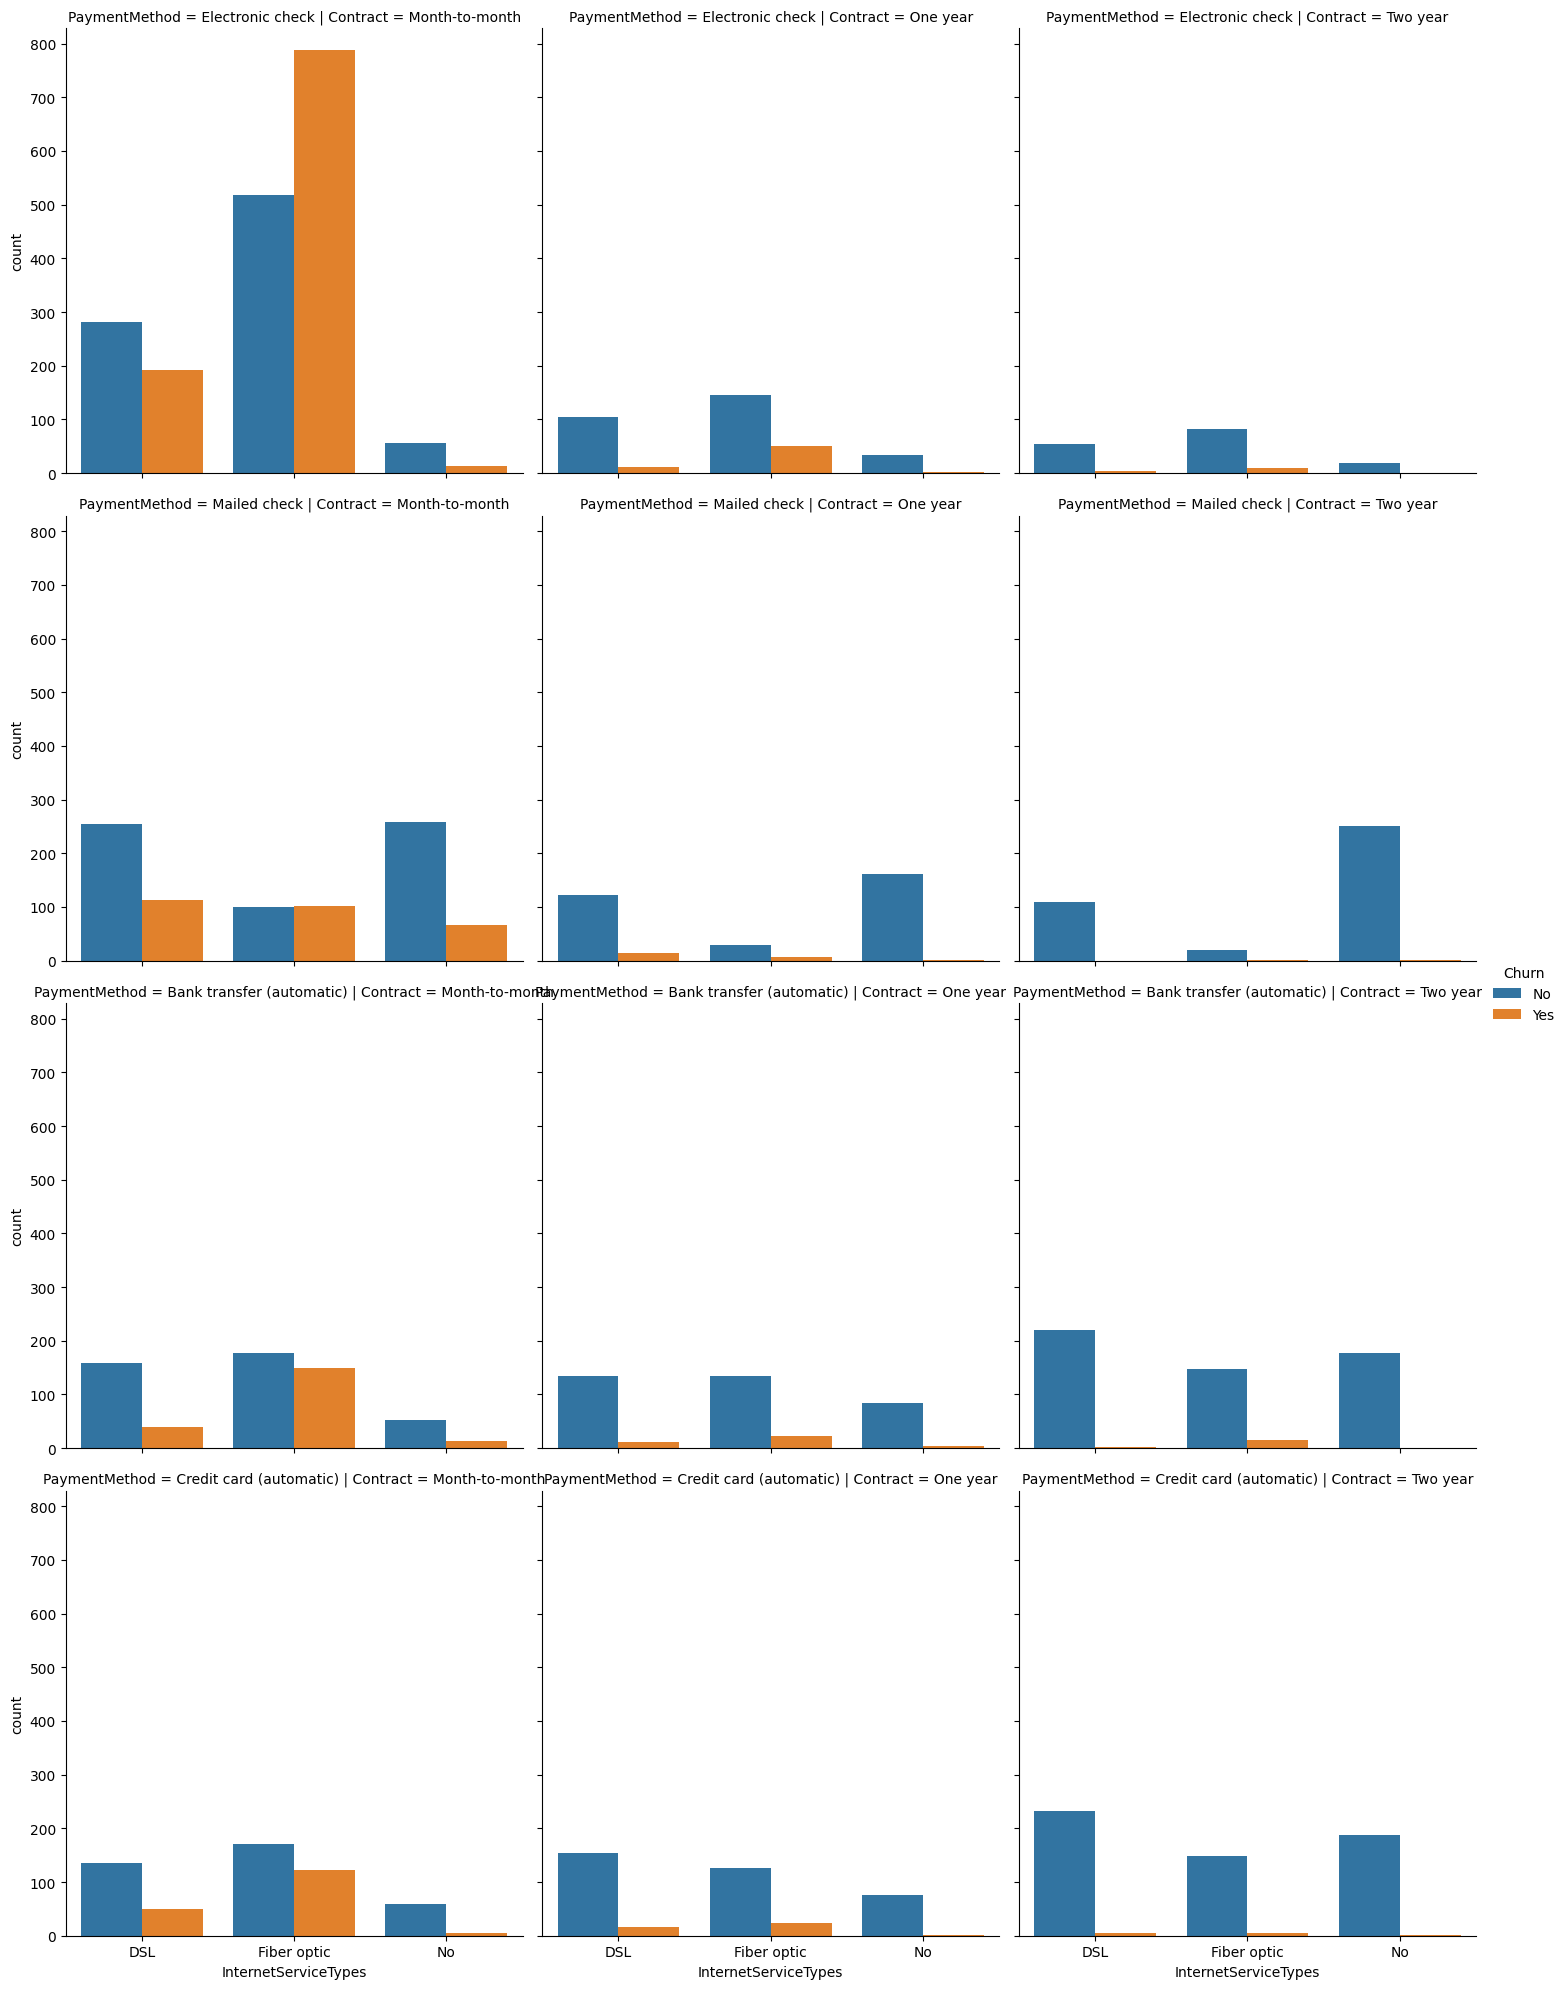

In [35]:
sns.catplot(x='InternetServiceTypes', hue='Churn', col='Contract', row='PaymentMethod', kind='count', data=df)
plt.show()

In [36]:
# The customer with fiber optic connection who have month to month contract and pays using electronic check or mailed check have higher churn rate than others

In [37]:
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceTypes,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
2851,1897-OKVMW,Female,No,Yes,Yes,64,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Mailed check,90.60,5817.45,No,Yes
6702,2027-CWDNU,Male,No,Yes,Yes,18,Yes,No,Fiber optic,No,...,Yes,No,Yes,Month-to-month,Yes,Electronic check,85.60,1601.50,No,Yes
387,1708-PBBOA,Female,No,No,No,42,No,No phone service,DSL,Yes,...,Yes,No,Yes,One year,Yes,Electronic check,54.75,2348.45,No,Yes
1376,3164-AALRN,Male,No,No,No,5,Yes,No,DSL,No,...,No,Yes,Yes,One year,Yes,Mailed check,70.00,347.40,Yes,Yes
5489,0804-XBFBV,Female,No,No,Yes,11,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,25.20,321.05,No,Yes


In [38]:
df.drop(columns=['customerID'], inplace = True)


In [39]:
df_dummy = pd.get_dummies(df, dtype='int', drop_first=True)


In [40]:
df_dummy.sample(5)


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,InternetService_Yes
5411,1,24.80,24.80,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
6824,66,80.45,5224.35,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,1
3792,26,91.25,2351.80,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,1
2186,46,19.95,862.40,1,0,1,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
3209,1,93.85,93.85,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,1


Text(0.5, 1.0, 'Monthly charges by churn')

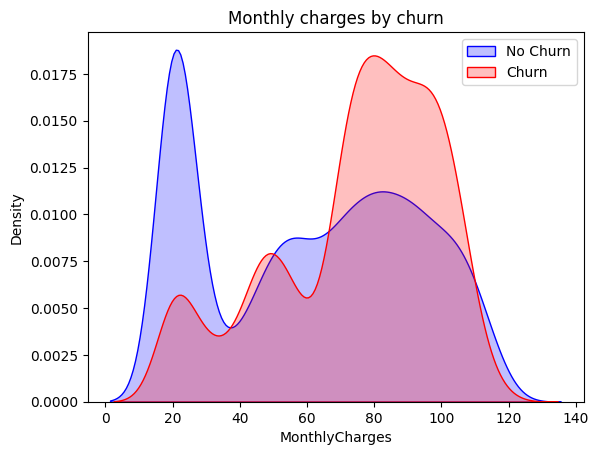

In [41]:
Mth = sns.kdeplot(df_dummy.MonthlyCharges[df_dummy["Churn_Yes"] == 0], color="Blue", shade=True)
Mth = sns.kdeplot(df_dummy.MonthlyCharges[df_dummy["Churn_Yes"] == 1], color="Red", shade=True)
Mth.legend(["No Churn", "Churn"])
Mth.set_title('Monthly charges by churn')



[]

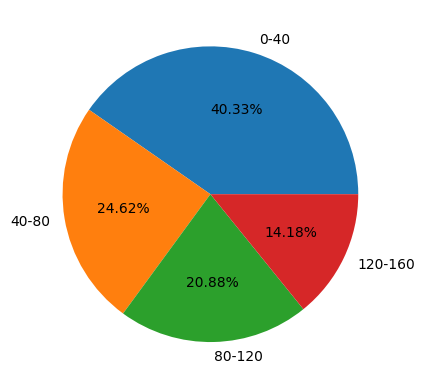

In [42]:
bins = [0, 40, 80, 120, 160]
labels = ['0-40', '40-80', '80-120', '120-160']

TC = pd.cut(df['TotalCharges'], bins=bins, labels=labels, include_lowest=True)

plt.pie(TC.value_counts(), labels = labels, autopct='%1.2f%%')
plt.plot()

In [43]:
# As monthly charges increase, the customer churn rate also rises, indicating a potential correlation between higher charges and customer dissatisfaction or service cancellation.
# The majority of customers have monthly charges in the range of 0–40, suggesting that most users are on lower-tier plans or use minimal services

Text(0.5, 1.0, 'Monthly charges by churn')

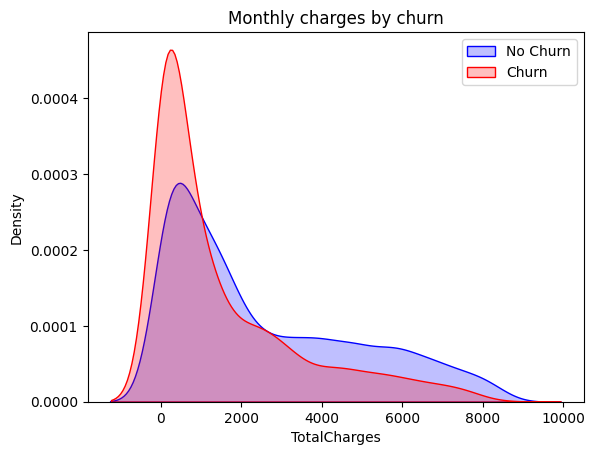

In [44]:
Tot = sns.kdeplot(df_dummy.TotalCharges[df_dummy["Churn_Yes"] == 0], color="Blue", shade=True)
Tot = sns.kdeplot(df_dummy.TotalCharges[df_dummy["Churn_Yes"] == 1], color="Red", shade=True)

Tot.legend(["No Churn", "Churn"])
Tot.set_title('Monthly charges by churn')


[]

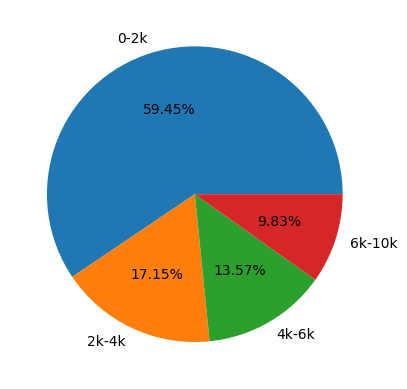

In [45]:
bins = [0, 2000, 4000, 6000, 10000]
labels = ['0-2k', '2k-4k', '4k-6k', '6k-10k']

TC = pd.cut(df['TotalCharges'], bins=bins, labels=labels, include_lowest=True)

plt.pie(TC.value_counts(), labels = labels, autopct='%1.2f%%')
plt.plot()

In [46]:
# The majority of customers fall within the 0–2k TotalCharges bracket.
# This group also exhibits a higher churn rate, suggesting that lower-spending customers are more likely to leave—possibly due to cost sensitivity or lower service commitment.

In [47]:
X = df_dummy.drop(columns=['Churn_Yes'])
y = df_dummy['Churn_Yes']

In [48]:
scaler = StandardScaler()

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.fit_transform(X[scale_cols])
X_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
0,-1.277445,-1.160323,-0.992611,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,0.066327,-0.259629,-0.172165,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
2,-1.236724,-0.362660,-0.958066,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.514251,-0.746535,-0.193672,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-1.236724,0.197365,-0.938874,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
#class weights

classes = np.unique(y_train)
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])
class_counts = np.bincount(y_train_numeric)
total_samples = len(y_train_numeric)
class_weights = total_samples / (len(classes) * class_counts)
class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
class_weights_dict

{np.int64(0): np.float64(0.680763653939101),
 np.int64(1): np.float64(1.8830213903743316)}

In [51]:
lr = LogisticRegression(class_weight=class_weights_dict)
dt = DecisionTreeClassifier(class_weight=class_weights_dict)


In [52]:
models = {'LogisticRegression': lr, 'DecisionTreeClassifier':dt}


In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test ,model.predict(X_test))
    cnf_matrix = confusion_matrix(y_test ,model.predict(X_test))
    prec = precision_score(y_test ,model.predict(X_test))
    recall = recall_score(y_test ,model.predict(X_test))
    f1 = f1_score(y_test ,model.predict(X_test))
    print(f"accuracy of {name} = {acc}")
    print(f"{cnf_matrix}")
    print(f"precision score = {prec}")
    print(f"recall = {recall}")
    print(f"f1 score = {f1}\n")

accuracy of LogisticRegression = 0.7501774308019872
[[749 287]
 [ 65 308]]
precision score = 0.5176470588235295
recall = 0.8257372654155496
f1 score = 0.6363636363636364

accuracy of DecisionTreeClassifier = 0.7359829666430092
[[854 182]
 [190 183]]
precision score = 0.5013698630136987
recall = 0.4906166219839142
f1 score = 0.4959349593495935



In [54]:
param_dist_lr = {
    'penalty': ['l2', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}


In [55]:
gs_models = [param_dist_lr, param_dist_dt]

In [56]:
# Random Search CV and Gird Search CV
for (name, model), parms in zip(models.items(), gs_models):

        grid_search = GridSearchCV(model, parms, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        print(f"{name}")
        print(grid_search.best_params_)
        print(grid_search.best_score_)
        print("-"*70)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
LogisticRegression
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7460063897763578
----------------------------------------------------------------------
Fitting 3 folds for each of 810 candidates, totalling 2430 fits
DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
0.7424565140220092
----------------------------------------------------------------------


In [57]:
rf = RandomForestClassifier(class_weight=class_weights_dict)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")


0.7984386089425124
[[945  91]
 [193 180]]
prec = 0.6642066420664207
recall = 0.48257372654155495
f1 = 0.5590062111801242


In [58]:
bc = BaggingClassifier(estimator=lr, )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.7537260468417317
[[752 284]
 [ 63 310]]
prec = 0.5218855218855218
recall = 0.8310991957104558
f1 = 0.6411582213029989


In [59]:
xb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"prec = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 = {f1_score(y_test, y_pred)}")

0.8076650106458482
[[935 101]
 [170 203]]
prec = 0.6677631578947368
recall = 0.5442359249329759
f1 = 0.5997045790251108


In [60]:
#tenure classified
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy = df.copy()
df_copy['tenure'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [61]:
df_copy.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceTypes,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
0,Female,No,Yes,No,1 - 12,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,No,No,No,25 - 36,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Yes
2,Male,No,No,No,1 - 12,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes
3,Male,No,No,No,37 - 48,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes
4,Female,No,No,No,1 - 12,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes


In [62]:
df_tenure_group = pd.get_dummies(df_copy, dtype='int', drop_first=True)


In [63]:
df_tenure_group.head()


,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_13 - 24,tenure_25 - 36,tenure_37 - 48,tenure_49 - 60,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,InternetService_Yes
0,29.85,29.85,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,56.95,1889.50,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,53.85,108.15,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
3,42.30,1840.75,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,70.70,151.65,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [64]:
X_tg = df_tenure_group.drop(columns=['Churn_Yes'])
y_tg = df_tenure_group['Churn_Yes']

In [65]:
sm = SMOTE()

X_tg_sm, y_tg_sm = sm.fit_resample(X_tg, y_tg)


In [66]:
X_train_tg, X_test_tg, y_train_tg, y_test_tg = train_test_split(X_tg_sm, y_tg_sm, test_size=0.2, random_state=42)


In [67]:
dt_1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8)


In [68]:
dt_1.fit(X_train_tg, y_train_tg)
acc = accuracy_score(y_test_tg ,dt_1.predict(X_test_tg))
cnf_matrix = confusion_matrix(y_test_tg ,dt_1.predict(X_test_tg))
prec = precision_score(y_test_tg ,dt_1.predict(X_test_tg))
recall = recall_score(y_test_tg ,dt_1.predict(X_test_tg))
f1 = f1_score(y_test_tg ,dt_1.predict(X_test_tg))
print(f"accuracy of DecisionTreeClassifier = {acc}")
print(f"{cnf_matrix}")
print(f"precision score = {prec}")
print(f"recall = {recall}")
print(f"f1 score = {f1}\n")
print(f"{classification_report(y_test_tg ,dt_1.predict(X_test_tg))}\n")

accuracy of DecisionTreeClassifier = 0.8120772946859903
[[788 233]
 [156 893]]
precision score = 0.7930728241563055
recall = 0.8512869399428027
f1 score = 0.8211494252873563

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1021
           1       0.79      0.85      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070




In [69]:
# using SMOTE-ENN for comparision


In [70]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [71]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)


In [72]:
print(f"acc: {acc}\nprec: {prec}\nrecall: {recall}\nf1_score: {f1}\n{matrix}")


acc: 0.9172413793103448
prec: 0.9258064516129032
recall: 0.9198717948717948
f1_score: 0.9228295819935691
[[490  46]
 [ 50 574]]


In [73]:
model_rf = RandomForestClassifier(random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"acc: {acc}\nprec: {prec}\nrecall: {recall}\nf1_score: {f1}\n{matrix}")  

acc: 0.925
prec: 0.908675799086758
recall: 0.9567307692307693
f1_score: 0.9320843091334895
[[476  60]
 [ 27 597]]


In [74]:
import pickle
pickle.dump(model_rf, open('model.pkl', 'wb'))


In [75]:
# Validation Testing

In [76]:
for i, col in enumerate(X.columns):
    print(f"{i}) {col}")

0) tenure
1) MonthlyCharges
2) TotalCharges
3) gender_Male
4) SeniorCitizen_Yes
5) Partner_Yes
6) Dependents_Yes
7) PhoneService_Yes
8) MultipleLines_No phone service
9) MultipleLines_Yes
10) InternetServiceTypes_Fiber optic
11) InternetServiceTypes_No
12) OnlineSecurity_No internet service
13) OnlineSecurity_Yes
14) OnlineBackup_No internet service
15) OnlineBackup_Yes
16) DeviceProtection_No internet service
17) DeviceProtection_Yes
18) TechSupport_No internet service
19) TechSupport_Yes
20) StreamingTV_No internet service
21) StreamingTV_Yes
22) StreamingMovies_No internet service
23) StreamingMovies_Yes
24) Contract_One year
25) Contract_Two year
26) PaperlessBilling_Yes
27) PaymentMethod_Credit card (automatic)
28) PaymentMethod_Electronic check
29) PaymentMethod_Mailed check
30) InternetService_Yes


In [77]:
test_data = pd.DataFrame([[2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1]], columns=X.columns)
test_data

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
0,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


In [78]:
if model_rf.predict(test_data) == 1:
    print('Churn')
else:
    print('No Churn')

Churn


In [79]:
df['InternetServiceTypes'].value_counts()


InternetServiceTypes
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [80]:
X.describe()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.783331
std,24.559481,30.090047,2266.794470,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.412004
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [82]:
# Finding top predictors
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
# Assume X is your feature dataframe and y is the churn label
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)



In [83]:
# Get the top 10 feature names
mask = selector.get_support()
top_features = X.columns[mask].tolist()
top_features

['tenure',
 'InternetServiceTypes_Fiber optic',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

In [84]:

X_new = X.copy()
X_new.drop(columns=['Dependents_Yes', 'MultipleLines_No phone service', 'InternetServiceTypes_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], inplace=True)

In [85]:
X_new.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,PhoneService_Yes,MultipleLines_Yes,InternetServiceTypes_Fiber optic,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Yes
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,34,56.95,1889.50,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,2,53.85,108.15,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,2,70.70,151.65,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [86]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X_new,y)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [88]:
model_rf = RandomForestClassifier(random_state = 100,max_depth=6, min_samples_leaf=8)

In [89]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"acc: {acc}\nprec: {prec}\nrecall: {recall}\nf1_score: {f1}\n{matrix}")  

acc: 0.9379370629370629
prec: 0.9276729559748428
recall: 0.959349593495935
f1_score: 0.9432454036770583
[[483  46]
 [ 25 590]]


In [90]:
import pickle
pickle.dump(model_rf, open('model.pkl', 'wb'))